In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt


<ipython-input-3-ce70ac8f8c3f>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 90)


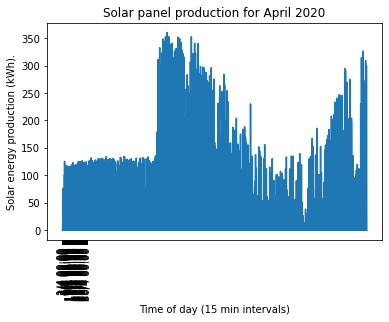

In [3]:
df = pd.read_csv(os.path.join('data', 'sunrock_raw.csv'), header=0)

df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d/%m/%Y %H:%M')

month = 4
start_date = dt.datetime(2020, 4, 1, 0, 0, 0)
end_date = dt.datetime(2020, 4, 30, 23, 0, 0)

mask = (df['DateTime'] > start_date) & (df['DateTime'] <= end_date)

april_readings = df.loc[mask]

total_list = df['Total'].tolist()

x_labels = []
month_label = month if len(str(month)) == 1 else '0' + month

for i in range(start_date.day, end_date.day + 1):
    day = str(i)
    for i in range(24):
        hour = str(i)
        if len(hour) == 1: hour = '0' + hour
        if i%24==0:
            x_labels.append(day + '/' + str(month_label) + ' ' + hour + ':00')
        else:
            x_labels.append('')
        
        x_labels.append('')
        x_labels.append('')
        x_labels.append('')

fig, ax = plt.subplots(1,1)
ax.set_title('Solar panel production for April 2020')
ax.set_ylabel('Solar energy production (kWh).')
ax.set_xlabel('Time of day (15 min intervals)')
ax.set_xticklabels(x_labels, rotation = 90)
ax.set_xticks(ticks=range(0,len(x_labels)))
ax.plot(total_list)

plt.show()